In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [23]:
data = pd.read_excel('water_treatment.xlsx', index_col=0)
data.head()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-01,41230.0,0.35,7.6,120.0,344.0,136.0,54.4,4.5,993,7.5,...,903.0,NaN,62.8,93.3,NaN,62.5,86.7,71.8,87.5,99.4
1990-01-02,37386.0,1.40,7.9,165.0,470.0,170.0,76.5,4.0,1365,7.9,...,1481.0,NaN,50.0,94.4,85.9,73.6,86.7,79.4,89.4,100.0
1990-01-03,34535.0,1.00,7.8,232.0,518.0,220.0,65.5,5.5,1617,7.9,...,1492.0,32.6,62.4,95.0,81.3,59.9,87.5,71.8,85.9,99.8
1990-01-04,32527.0,3.00,7.8,187.0,460.0,180.0,67.8,5.2,1832,7.9,...,1590.0,13.2,57.6,95.5,85.3,70.4,85.0,77.2,83.3,100.0
1990-01-07,27760.0,1.20,7.6,199.0,466.0,186.0,74.2,4.5,1220,7.5,...,1411.0,38.2,46.6,95.0,84.9,61.1,89.4,73.8,86.6,99.6


N.  Attrib.    <br />
 1  Q-E        (input flow to plant) <br />
 2  ZN-E       (input Zinc to plant) <br />
 3  PH-E       (input pH to plant) <br />
 4  DBO-E      (input Biological demand of oxygen to plant) <br />
 5  DQO-E      (input chemical demand of oxygen to plant) <br />
 6  SS-E       (input suspended solids to plant) <br />
 7  SSV-E      (input volatile supended solids to plant) <br />
 8  SED-E      (input sediments to plant) <br />
 9  COND-E     (input conductivity to plant) <br />
10  PH-P       (input pH to primary settler) <br />
11  DBO-P      (input Biological demand of oxygen to primary settler) <br />
12  SS-P       (input suspended solids to primary settler) <br />
13  SSV-P      (input volatile supended solids to primary settler) <br />
14  SED-P      (input sediments to primary settler) <br />
15  COND-P     (input conductivity to primary settler) <br />
16  PH-D       (input pH to secondary settler) <br />
17  DBO-D      (input Biological demand of oxygen to secondary settler) <br />
18  DQO-D      (input chemical demand of oxygen to secondary settler) <br />
19  SS-D       (input suspended solids to secondary settler) <br />
20  SSV-D      (input volatile supended solids to secondary settler) <br />
21  SED-D      (input sediments to secondary settler) <br />
22  COND-D     (input conductivity to secondary settler) <br />
23  PH-S       (output pH) <br />
24  DBO-S      (output Biological demand of oxygen) <br />
25  DQO-S      (output chemical demand of oxygen) <br />
26  SS-S       (output suspended solids) <br />
27  SSV-S      (output volatile supended solids) <br />
28  SED-S      (output sediments) <br />
29  COND-S     (output conductivity) <br />
30  RD-DBO-P   (performance input Biological demand of oxygen in primary settler) <br />
31  RD-SS-P    (performance input suspended solids to primary settler) <br />
32  RD-SED-P   (performance input sediments to primary settler) <br />
33  RD-DBO-S   (performance input Biological demand of oxygen to secondary settler) <br />
34  RD-DQO-S   (performance input chemical demand of oxygen to secondary settler) <br />
35  RD-DBO-G   (global performance input Biological demand of oxygen) <br />
36  RD-DQO-G   (global performance input chemical demand of oxygen) <br />
37  RD-SS-G    (global performance input suspended solids) <br />
38  RD-SED-G   (global performance input sediments) <br />

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 527 entries, 1990-01-01 to 1991-10-30
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Q-E       509 non-null    float64
 1   ZN-E      524 non-null    float64
 2   PH-E      527 non-null    float64
 3   DBO-E     504 non-null    float64
 4   DQO-E     521 non-null    float64
 5   SS-E      526 non-null    float64
 6   SSV-E     516 non-null    float64
 7   SED-E     502 non-null    float64
 8   COND-E    527 non-null    int64  
 9   PH-P      527 non-null    float64
 10  DBO-P     487 non-null    float64
 11  SS-P      527 non-null    int64  
 12  SSV-P     516 non-null    float64
 13  SED-P     503 non-null    float64
 14  COND-P    527 non-null    int64  
 15  PH-D      527 non-null    float64
 16  DBO-D     499 non-null    float64
 17  DQO-D     518 non-null    float64
 18  SS-D      525 non-null    float64
 19  SSV-D     514 non-null    float64
 20  SED-D     502

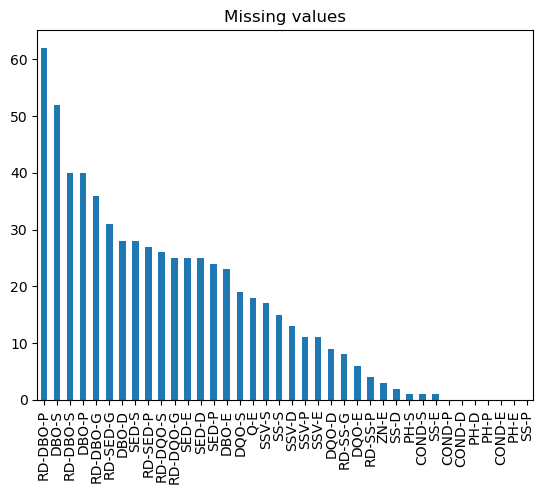

In [25]:
data.isna().sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Missing values")
plt.show()

In [26]:
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 527 entries, 1990-01-01 to 1991-10-30
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Q-E       527 non-null    float64
 1   ZN-E      527 non-null    float64
 2   PH-E      527 non-null    float64
 3   DBO-E     527 non-null    float64
 4   DQO-E     527 non-null    float64
 5   SS-E      527 non-null    float64
 6   SSV-E     527 non-null    float64
 7   SED-E     527 non-null    float64
 8   COND-E    527 non-null    int64  
 9   PH-P      527 non-null    float64
 10  DBO-P     527 non-null    float64
 11  SS-P      527 non-null    int64  
 12  SSV-P     527 non-null    float64
 13  SED-P     527 non-null    float64
 14  COND-P    527 non-null    int64  
 15  PH-D      527 non-null    float64
 16  DBO-D     527 non-null    float64
 17  DQO-D     527 non-null    float64
 18  SS-D      527 non-null    float64
 19  SSV-D     527 non-null    float64
 20  SED-D     527

In [45]:
data.head()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-01,41230.0,0.35,7.6,120.0,344.0,136.0,54.4,4.5,993,7.5,...,903.0,32.6,62.8,93.3,85.9,62.5,86.7,71.8,87.5,99.4
1990-01-02,37386.0,1.40,7.9,165.0,470.0,170.0,76.5,4.0,1365,7.9,...,1481.0,32.6,50.0,94.4,85.9,73.6,86.7,79.4,89.4,100.0
1990-01-03,34535.0,1.00,7.8,232.0,518.0,220.0,65.5,5.5,1617,7.9,...,1492.0,32.6,62.4,95.0,81.3,59.9,87.5,71.8,85.9,99.8
1990-01-04,32527.0,3.00,7.8,187.0,460.0,180.0,67.8,5.2,1832,7.9,...,1590.0,13.2,57.6,95.5,85.3,70.4,85.0,77.2,83.3,100.0
1990-01-07,27760.0,1.20,7.6,199.0,466.0,186.0,74.2,4.5,1220,7.5,...,1411.0,38.2,46.6,95.0,84.9,61.1,89.4,73.8,86.6,99.6


In [27]:
data.describe()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,...,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,37156.597723,2.351898,7.810057,189.592030,406.681214,227.358634,61.521252,4.569450,1478.620493,7.829981,...,1494.559772,38.941176,58.490512,90.514611,83.011195,67.495825,88.862619,77.865844,88.948577,99.095256
std,6532.093613,2.743941,0.246175,63.311039,119.798313,135.825733,12.317258,2.703553,394.898019,0.226925,...,387.582411,14.651666,12.763216,8.888267,9.758616,12.181906,7.522053,9.047881,8.198149,4.367178
min,10050.000000,0.100000,6.900000,31.000000,81.000000,98.000000,13.200000,0.400000,651.000000,7.300000,...,683.000000,0.600000,5.300000,7.700000,8.200000,1.400000,19.600000,19.200000,10.300000,36.400000
25%,32964.000000,0.900000,7.600000,147.500000,325.500000,170.000000,55.850000,3.100000,1201.000000,7.700000,...,1235.000000,29.100000,50.550000,88.600000,81.050000,62.850000,87.450000,73.850000,87.550000,99.300000
50%,35729.000000,1.500000,7.800000,183.000000,398.000000,196.000000,64.400000,4.500000,1406.000000,7.800000,...,1431.000000,39.000000,59.300000,93.300000,85.300000,69.700000,90.200000,79.100000,90.700000,99.700000
75%,41094.000000,3.000000,8.000000,223.000000,474.500000,242.000000,69.600000,5.500000,1672.000000,8.000000,...,1691.500000,48.850000,66.800000,96.000000,87.850000,75.250000,92.400000,83.500000,93.000000,100.000000
max,60081.000000,33.500000,8.700000,438.000000,941.000000,2008.000000,85.000000,36.000000,3230.000000,8.500000,...,3950.000000,79.100000,96.100000,100.000000,94.700000,96.800000,97.000000,98.100000,99.400000,100.000000


In [28]:
data.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,DBO-P,SS-P,SSV-P,SED-P,COND-P,PH-D,DBO-D,DQO-D,SS-D,SSV-D,SED-D,COND-D,PH-S,DBO-S,DQO-S,SS-S,SSV-S,SED-S,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
Q-E,1.0,0.036,0.15,-0.18,-0.33,-0.0084,-0.32,-0.12,-0.083,0.16,-0.21,-0.024,-0.3,-0.13,-0.073,0.14,-0.17,-0.21,-0.061,-0.33,-0.083,-0.095,0.042,0.0084,-0.079,-0.028,-0.13,0.0005,-0.072,-0.086,-0.024,-0.052,-0.042,-0.04,-0.074,-0.16,-0.019,0.00037
ZN-E,0.036,1.0,-0.011,0.0057,0.085,0.091,-0.098,0.08,0.053,0.00046,0.036,0.032,-0.068,0.068,0.051,0.031,0.11,0.082,0.096,-0.027,0.065,0.06,-0.096,-0.01,0.0039,-0.069,0.074,-0.043,0.07,-0.067,0.05,0.016,0.074,0.042,0.038,0.059,0.11,0.032
PH-E,0.15,-0.011,1.0,0.22,0.18,-0.046,0.18,0.05,0.27,0.9,0.21,-0.031,0.19,0.057,0.28,0.82,0.29,0.26,0.14,0.13,0.21,0.27,0.33,-0.032,-0.061,-0.09,0.11,-0.024,0.23,-0.039,-0.15,-0.15,0.19,0.22,0.12,0.14,0.065,0.021
DBO-E,-0.18,0.0057,0.22,1.0,0.49,0.12,0.23,0.24,0.2,0.22,0.67,0.12,0.18,0.22,0.22,0.22,0.57,0.42,0.3,0.15,0.25,0.24,0.018,0.1,0.18,0.082,0.025,0.044,0.2,0.15,-0.019,-0.069,0.17,0.081,0.28,0.15,0.019,-0.035
DQO-E,-0.33,0.085,0.18,0.49,1.0,0.29,0.25,0.43,0.31,0.17,0.53,0.24,0.21,0.38,0.31,0.19,0.52,0.64,0.34,0.16,0.26,0.33,-0.022,0.09,0.3,0.072,0.091,0.023,0.28,0.077,0.13,0.053,0.1,0.088,0.097,0.32,0.11,0.0027
SS-E,-0.0084,0.091,-0.046,0.12,0.29,1.0,-0.54,0.58,0.083,-0.1,0.13,0.88,-0.5,0.56,0.08,-0.071,0.0076,-0.024,0.2,-0.27,0.044,0.08,0.041,0.019,0.031,0.0026,-0.12,0.025,0.079,0.18,0.48,0.14,0.002,-0.05,0.059,0.15,0.26,-0.0026
SSV-E,-0.32,-0.098,0.18,0.23,0.25,-0.54,1.0,-0.14,0.17,0.22,0.23,-0.5,0.87,-0.16,0.17,0.19,0.37,0.43,-0.085,0.68,0.11,0.2,-0.076,-0.014,0.11,-0.0063,0.34,-0.022,0.16,-0.15,-0.39,-0.074,0.13,0.17,0.048,0.083,-0.19,0.025
SED-E,-0.12,0.08,0.05,0.24,0.43,0.58,-0.14,1.0,0.19,0.045,0.26,0.58,-0.14,0.84,0.19,0.074,0.23,0.22,0.19,0.02,0.15,0.19,5.6e-05,0.024,0.065,-0.0077,0.041,0.013,0.16,0.073,0.32,0.15,0.077,0.1,0.083,0.23,0.2,0.053
COND-E,-0.083,0.053,0.27,0.2,0.31,0.083,0.17,0.19,1.0,0.24,0.2,0.091,0.16,0.18,0.97,0.23,0.3,0.38,0.12,0.13,0.14,0.94,0.067,0.0071,0.15,0.033,-0.003,-0.036,0.9,-0.056,0.059,0.02,0.13,0.1,0.09,0.068,0.033,0.052
PH-P,0.16,0.00046,0.9,0.22,0.17,-0.1,0.22,0.045,0.24,1.0,0.19,-0.093,0.19,0.028,0.26,0.89,0.27,0.28,0.13,0.13,0.23,0.25,0.38,-0.022,-0.046,-0.086,0.13,-0.0098,0.21,-0.049,-0.19,-0.17,0.15,0.22,0.093,0.12,0.033,0.016


In [75]:
# Create correlation matrix
corr_matrix = data.corr().abs().unstack().sort_values()
print(corr_matrix[corr_matrix < 1])

SED-E     PH-S        0.000056
PH-S      SED-E       0.000056
Q-E       RD-SED-G    0.000374
RD-SED-G  Q-E         0.000374
ZN-E      PH-P        0.000461
                        ...   
COND-D    COND-P      0.947565
RD-SED-G  SED-S       0.953474
SED-S     RD-SED-G    0.953474
COND-E    COND-P      0.973147
COND-P    COND-E      0.973147
Length: 1406, dtype: float64


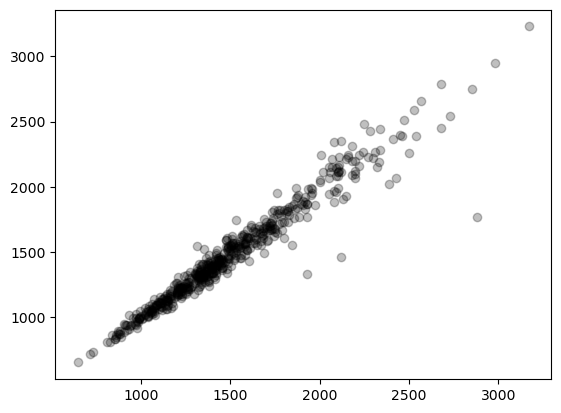

In [76]:
x = data['COND-P']
y = data['COND-E']
plt.scatter(x, y, c='black', alpha=0.25)

In [31]:
def k_means(data, k):
    centroids = initialize_centroids(data, k)
    
    while True:
        old_centroids = centroids
        labels = get_labels(data, centroids)
        centroids = update_centroids(data, labels, k)
        
        if should_stop(old_centroids, centroids): 
            break
    
    return labels, centroids

def initialize_centroids(data, k):
    x_min = y_min = float('inf')
    x_max = y_max = float('-inf')
    for point in data:
        x_min = min(point[0], x_min)
        x_max = max(point[0], x_max)
        y_min = min(point[1], y_min)
        y_max = max(point[1], y_max)
        
    centroids = []
    for i in range(k):
        centroids.append([random_sample(x_min, x_max), 
                          random_sample(y_min, y_max)])
    return centroids

def random_sample(low, high):
    return low + (high - low) * random.random()

def get_labels(data, centroids):
    labels = []
    for point in data:
        min_dist = float('inf')
        label = None
        for i, centroid in enumerate(centroids):
            new_dist = get_distance(point, centroid)
            if min_dist > new_dist:
                min_dist = new_dist
                label = i
        labels.append(label)
    return labels

def get_distance(point_1, point_2):
    return((point_1[0] - point_2[0]) ** 2 +
           (point_1[1] - point_2[1]) ** 2) ** 0.5

def update_centroids(points, labels, k):
    new_centroids = [[0, 0] for i in range(k)]
    counts = [0] * k
    
    for point, label in zip(points, labels):
        new_centroids[label][0] += point[0]
        new_centroids[label][1] += point[1]
        counts[label] += 1
        
    for i, (x, y) in enumerate(new_centroids):
        new_centroids[i] = (x / counts[i], y / counts[i])
    return new_centroids

def should_stop(old_centroids, centroids, threshold=1e-3):
    total_movement = 0
    for old_point, new_point in zip(old_centroids, centroids):
        total_movement += get_distance(old_point, new_point)
    return total_movement < threshold

# Code reference: https://www.youtube.com/watch?v=uLs-EYUpGAw

In [82]:
points = np.transpose((x, y))     
labels, centroids = k_means(points, 4)

labels = np.array(labels)
centroids = np.array(centroids)
print(labels)
print(centroids)

ZeroDivisionError: division by zero

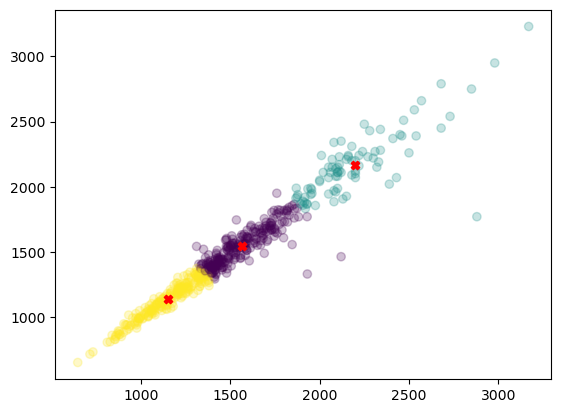

In [81]:
plt.scatter(x, y, c=labels, alpha=0.25)
for i in range(len(centroids)):
    plt.scatter(centroids[i, 0], centroids[i, 1], c='r', marker='X')

# elbow method kebanyakan menggunakan library sklearn kmeans secara langsung